# CNN-CIFAR10

## setup

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils

%matplotlib inline

## explore data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

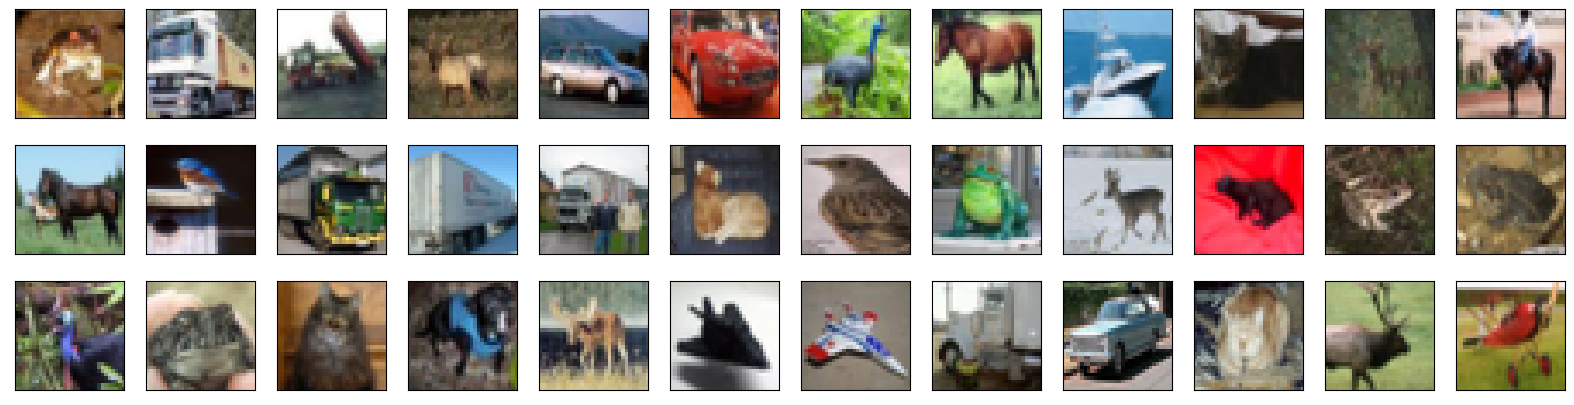

In [3]:
fig = plt.figure(figsize=(20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

## image preprocessiong

In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [5]:
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print(x_valid.shape[0], "validation samples")

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


## build the model

In [7]:
model = Sequential(
    [
        Conv2D(
            filters=16,
            kernel_size=2,
            padding="same",
            activation="relu",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(500, activation="relu"),
        Dropout(0.4),
        Dense(10, activation="softmax"),
    ]
)

Metal device set to: Apple M1 Max


2022-12-05 23:00:09.625345: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-05 23:00:09.625442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

## train the model

In [9]:
model.compile(
    loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [10]:
checkpointer = ModelCheckpoint(
    filepath="model.weights.best.hdf5", verbose=1, save_best_only=True
)
hist = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpointer],
    verbose=2,
    shuffle=True,
)

Epoch 1/10


2022-12-05 23:00:10.064255: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 23:00:10.286300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 23:00:26.586009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.28168, saving model to model.weights.best.hdf5
1407/1407 - 18s - loss: 1.5671 - accuracy: 0.4331 - val_loss: 1.2817 - val_accuracy: 0.5456 - 18s/epoch - 13ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.28168 to 1.10953, saving model to model.weights.best.hdf5
1407/1407 - 18s - loss: 1.2543 - accuracy: 0.5527 - val_loss: 1.1095 - val_accuracy: 0.6042 - 18s/epoch - 12ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 1.10953
1407/1407 - 18s - loss: 1.1259 - accuracy: 0.6001 - val_loss: 1.1447 - val_accuracy: 0.5892 - 18s/epoch - 13ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.10953 to 0.96024, saving model to model.weights.best.hdf5
1407/1407 - 18s - loss: 1.0500 - accuracy: 0.6273 - val_loss: 0.9602 - val_accuracy: 0.6616 - 18s/epoch - 12ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.96024
1407/1407 - 17s - loss: 0.9902 - accuracy: 0.6511 - val_loss: 1.1633 - val_accuracy: 0.6006 - 17s/epoch - 12ms/step
Epoch

In [11]:
model.load_weights("model.weights.best.hdf5")
score = model.evaluate(x_test, y_test, verbose=0)
print("\n", "Test accuracy:", score[1])


 Test accuracy: 0.6790000200271606
